In [2]:
from typing import Union, List
from pathlib import Path
import re
from ipywidgets import interact, IntSlider, Layout


from epic_kitchens.hoa import load_detections, DetectionRenderer
import PIL.Image

In [3]:
class LazyFrameLoader:
    def __init__(self, path: Union[Path, str], frame_template: str = 'frame_{:010d}.jpg'):
        self.path = Path(path)
        self.frame_template = frame_template
        
    def __getitem__(self, idx: int) -> PIL.Image.Image:
        return PIL.Image.open(str(self.path / self.frame_template.format(idx + 1)))

In [3]:
root = Path('/data/ego4d_data/v2/')
video_id = 'ce85a66a-6417-430c-a300-d69ee4528913'
video_detections = load_detections(root / 'hand-objects' / (video_id + '.pkl'))
max_frame_idx = len(video_detections) - 1
max_frame_idx

20204

In [7]:
frames = LazyFrameLoader(root / "rgb_frames" / video_id)
renderer = DetectionRenderer(hand_threshold=0.1, object_threshold=0.01)

In [9]:
frame_idx = 1573
video_detections[frame_idx]

FrameDetections(video_id='', frame_number=1574, objects=[ObjectDetection(bbox=BBox(left=0.7173610925674438, top=0.3361110985279083, right=0.7652778029441833, bottom=0.3861111104488373), score=0.3106249272823334), ObjectDetection(bbox=BBox(left=0.4305555522441864, top=0.18703703582286835, right=0.9604166746139526, bottom=0.960185170173645), score=0.05865459144115448), ObjectDetection(bbox=BBox(left=0.7208333611488342, top=0.35277777910232544, right=0.800694465637207, bottom=0.4203703701496124), score=0.011663045734167099), ObjectDetection(bbox=BBox(left=0.7486110925674438, top=0.3490740656852722, right=0.8909721970558167, bottom=0.5046296119689941), score=0.00320434826426208), ObjectDetection(bbox=BBox(left=0.33472222089767456, top=0.7250000238418579, right=0.9277777671813965, bottom=0.9916666746139526), score=0.0002970334026031196), ObjectDetection(bbox=BBox(left=0.39097222685813904, top=0.9018518328666687, right=0.44583332538604736, bottom=0.9907407164573669), score=0.0002891046169679

In [10]:
@interact(frame_idx=IntSlider(value=1488, min=0, max=max_frame_idx, layout=Layout(width='650px')))
def render_detections(frame_idx):
    return renderer.render_detections(frames[frame_idx], video_detections[frame_idx])

interactive(children=(IntSlider(value=1488, description='frame_idx', layout=Layout(width='650px'), max=20204),…

In [9]:
# Adjust these to the where-ever your detections and frames are stored.

# detections_root should point to a folder with the structure
# detections_root
# |-- PXX
# |   |--- PXX_YY.pkl
detections_root = Path('../detections')

# frame_root shout point to a folder with the structure
# frames_root
# |-- PXX
# |   |-- PXX_YY
# |   |   |-- frame_zzzzzzzzzz.jpg
frames_root = Path('../frames')

In [4]:
root = Path('/data/EPIC-KITCHENS/')

In [5]:
video_id = 'P02_12'
participant_id = video_id[:3]
video_detections = load_detections(root / participant_id / 'hand-objects' / (video_id + '.pkl'))
max_frame_idx = len(video_detections) - 1
max_frame_idx

78925

In [92]:
frame_idx = 3569
det_frame = video_detections[frame_idx]

In [94]:
from epic_kitchens.hoa.types import HandSide

frame_idx = 3570
det_frame = video_detections[frame_idx]
det_frame.get_hand_object_interactions()

right_hand = [hand_id for hand_id, hand in enumerate(det_frame.hands) if hand.side == HandSide.RIGHT][0]
right_hand_obj = det_frame.get_hand_object_interactions()[right_hand]

bbox = det_frame.objects[right_hand_obj].bbox
bbox = [bbox.left * 456, bbox.top * 256, (bbox.right - bbox.left) * 456, (bbox.bottom - bbox.top) *256]

tracker_bbox = [275.9836540222168, 143.7897453308106, 46.607276916503906, 108.5817642211914]

def iou_xyhw(bbox1, bbox2):
    x1, y1, w1, h1 = bbox1
    x2, y2, w2, h2 = bbox2
    
    x1 = x1 - w1 / 2
    y1 = y1 - h1 / 2
    x2 = x2 - w2 / 2
    y2 = y2 - h2 / 2
    
    w_intersection = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_intersection = min(y1 + h1, y2 + h2) - max(y1, y2)
    
    if w_intersection <= 0 or h_intersection <= 0: # No overlap
        return 0.0
    
    intersection = w_intersection * h_intersection
    union = w1 * h1 + w2 * h2 - intersection
    
    return intersection / union

iou_xyhw(bbox, tracker_bbox)

0.2074864429709966

In [7]:
video_detections[frame_idx].get_hand_object_interactions(
                    object_threshold=0.01, hand_threshold=0.1
                )

{0: 3, 1: 1}

In [8]:
frames = LazyFrameLoader(root / participant_id / "rgb_frames" / video_id)
renderer = DetectionRenderer(hand_threshold=0.1, object_threshold=0.01)

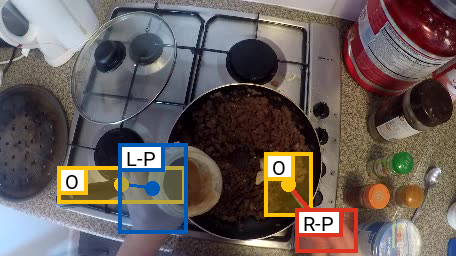

In [9]:
renderer.render_detections(frames[frame_idx], video_detections[frame_idx])

In [11]:

@interact(frame_idx=IntSlider(value=3583, min=0, max=max_frame_idx, layout=Layout(width='650px')))
def render_detections(frame_idx):
    return renderer.render_detections(frames[frame_idx], video_detections[frame_idx])

interactive(children=(IntSlider(value=3583, description='frame_idx', layout=Layout(width='650px'), max=78925),…

In [21]:
import imageio
import numpy as np

# Assuming you have the following variables:
# - max_frame: maximum frame index
# - frames: list of PIL images

# Create an empty list to store the frames as numpy arrays
video_frames = []

# Iterate through the frames and convert them to numpy arrays
for frame_idx in range(38368 + 1):
    # Assuming renderer.render_detections() returns a PIL image for each frame
    pil_image = renderer.render_detections(frames[frame_idx], video_detections[frame_idx])
    numpy_image = pil_image.convert('RGB')  # Convert PIL image to RGB mode
    video_frames.append(np.array(numpy_image))

# Define the output video filename
output_filename = 'P02_122_detections_01_001_thresholds.mp4'

# Save the frames as a video using imageio
imageio.mimwrite(output_filename, video_frames, fps=50)  # Adjust the desired frame rate (fps) if needed


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (456, 256) to (464, 256) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x711cb80] Warning: data is not aligned! This can lead to a speed loss
